# K-means clustering

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

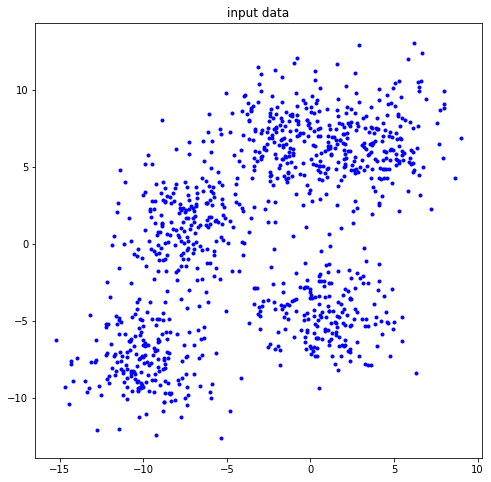

In [3]:
plt.figure(figsize=(8,8))   
plt.title('input data')
plt.plot(x, y, '.', color = 'blue')

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [4]:
a = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])
b = np.array([[1,1]])
print(a.shape, b.shape)
print(((a-b)**2))
print(np.sqrt(((a-b)**2).sum(axis=1)))

(5, 2) (1, 2)
[[ 0  0]
 [ 1  1]
 [ 4  4]
 [ 9  9]
 [16 16]]
[0.         1.41421356 2.82842712 4.24264069 5.65685425]


In [5]:
def compute_distance(feature, center):
    
    square_abs = (feature-center)**2
    value = square_abs.sum(axis=1)
    distance = np.sqrt(value)
    
    return distance

print(compute_distance(a,b))

[0.         1.41421356 2.82842712 4.24264069 5.65685425]


## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [6]:
print(feature.shape[0])
a = np.zeros(feature[0].shape)
print(feature[0])
print(a+feature[0]+feature[0])

1000
[-2.78158782  6.13851704]
[-5.56317564 12.27703408]


In [7]:
def compute_centroid(feature, label_feature, value_label):
    
    add = np.zeros(feature[0].shape);
    num = 0
    
    for i in range(feature.shape[0]):
        if(label_feature[i] == value_label):
            add = add + feature[i]
            num = num + 1
    
    centroid = (1/num)*add
    
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [8]:
a = np.array([[1,2],[2,4],[3,2],[5,2],[7,10],[1,12],[10,2]])
print(a.argmax(axis=1))
print(a.sum())

[1 1 0 0 1 1 0]
63


In [9]:
def compute_label(distance):
    
    label_feature = distance.argmin(axis=1)
    
    return label_feature


In [10]:
# assign the number of clusters and iterations
k = 10
max_iter = 100

number_cluster      = k
number_iteration    = max_iter
# ===================================================
print(number_data, number_cluster, number_feature, number_iteration)

1000 10 2 100


In [15]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

for k in range(number_cluster):
    random_index = np.random.randint(0,number_data)
    centroid[k] = feature[random_index]
    distance[:, k] = compute_distance(feature, centroid[k])
    
label_feature = compute_label(distance)

print(centroid)
print(distance.shape)
print(label_feature.shape)

# initialize centroid and label_feature
# ==========================================================
#plot_cluster(feature, label_feature, 10)
print((1/1000)*distance.sum())

[[ -5.15917491   2.35866779]
 [-10.31666669  -9.49085462]
 [  4.66937296   4.82783776]
 [ -5.29313188   3.77694215]
 [  0.14147018   6.37814347]
 [ -5.90759208   2.48699109]
 [ -8.50553233  -7.41949796]
 [ -6.02437727  -9.65236633]
 [ -0.22077949  -5.76895577]
 [ -8.47623122  -7.12146255]]
(1000, 10)
(1000,)
101.8941305580337


In [16]:
for i in range(number_iteration):
    
    for k in range(number_cluster):
        centroid[k,:] = compute_centroid(feature, label_feature, k)  #update k_th centroid
        distance[:, k] = compute_distance(feature, centroid[k,:])   #compute distance from k_th centroid
    
    label_feature = compute_label(distance)   #update label(argmin distance)
    loss = (1/number_data)*(distance.sum())
    loss_iteration[i] = loss
    centroid_iteration[i] = centroid
    print("[%4d] loss = %5.5f" % (i, loss))
    print(centroid)
    

[   0] loss = 103.51378
[[ -4.25675327   0.75813316]
 [-11.14193948  -8.83326325]
 [  4.71181526   6.19729702]
 [ -4.94798998   5.51412855]
 [ -0.31992936   7.07998729]
 [ -8.13252324   1.19552929]
 [ -9.07643331  -7.92543062]
 [ -6.4565522   -9.79427787]
 [  0.89938563  -4.67236658]
 [ -9.36952324  -5.27830475]]
[   1] loss = 103.86951
[[ -4.43598009   0.57104753]
 [-11.60710694  -8.59345971]
 [  4.54067528   6.33292112]
 [ -4.5669377    5.97007103]
 [ -0.25886924   7.0901542 ]
 [ -8.32674775   1.21325359]
 [ -8.98725376  -7.95987681]
 [ -7.10457118  -9.72226898]
 [  0.98300432  -4.62017465]
 [ -9.57323535  -4.97954343]]
[   2] loss = 103.93429
[[ -4.61573055   0.6539124 ]
 [-11.70194338  -8.58170027]
 [  4.48784222   6.37519167]
 [ -4.30429298   6.24821134]
 [ -0.24397426   7.04996815]
 [ -8.38875741   1.31086221]
 [ -9.08522835  -7.74965633]
 [ -7.29631396  -9.65925388]
 [  0.98300432  -4.62017465]
 [ -9.65983072  -4.89372853]]
[   3] loss = 103.95150
[[ -4.74203489   0.71950184]
 [

[  27] loss = 101.60235
[[ -4.64507846   2.02972226]
 [-11.4221905   -8.43280988]
 [  4.75974248   7.22740177]
 [ -1.97435804   7.6039095 ]
 [  1.43615637   4.94730343]
 [ -8.18403555   3.17690249]
 [ -9.96409928  -5.39922617]
 [ -7.87282445  -8.87097446]
 [  0.91135333  -4.64959364]
 [ -8.02528315  -0.71292167]]
[  28] loss = 101.54192
[[ -4.64507846   2.02972226]
 [-11.4221905   -8.43280988]
 [  4.75974248   7.22740177]
 [ -1.97435804   7.6039095 ]
 [  1.43615637   4.94730343]
 [ -8.18403555   3.17690249]
 [ -9.8795821   -5.35002625]
 [ -7.87282445  -8.87097446]
 [  0.91135333  -4.64959364]
 [ -8.04499027  -0.6376215 ]]
[  29] loss = 101.54192
[[ -4.64507846   2.02972226]
 [-11.4221905   -8.43280988]
 [  4.75974248   7.22740177]
 [ -1.97435804   7.6039095 ]
 [  1.43615637   4.94730343]
 [ -8.18403555   3.17690249]
 [ -9.8795821   -5.35002625]
 [ -7.87282445  -8.87097446]
 [  0.91135333  -4.64959364]
 [ -8.04499027  -0.6376215 ]]
[  30] loss = 101.54192
[[ -4.64507846   2.02972226]
 [

[  67] loss = 101.54192
[[ -4.64507846   2.02972226]
 [-11.4221905   -8.43280988]
 [  4.75974248   7.22740177]
 [ -1.97435804   7.6039095 ]
 [  1.43615637   4.94730343]
 [ -8.18403555   3.17690249]
 [ -9.8795821   -5.35002625]
 [ -7.87282445  -8.87097446]
 [  0.91135333  -4.64959364]
 [ -8.04499027  -0.6376215 ]]
[  68] loss = 101.54192
[[ -4.64507846   2.02972226]
 [-11.4221905   -8.43280988]
 [  4.75974248   7.22740177]
 [ -1.97435804   7.6039095 ]
 [  1.43615637   4.94730343]
 [ -8.18403555   3.17690249]
 [ -9.8795821   -5.35002625]
 [ -7.87282445  -8.87097446]
 [  0.91135333  -4.64959364]
 [ -8.04499027  -0.6376215 ]]
[  69] loss = 101.54192
[[ -4.64507846   2.02972226]
 [-11.4221905   -8.43280988]
 [  4.75974248   7.22740177]
 [ -1.97435804   7.6039095 ]
 [  1.43615637   4.94730343]
 [ -8.18403555   3.17690249]
 [ -9.8795821   -5.35002625]
 [ -7.87282445  -8.87097446]
 [  0.91135333  -4.64959364]
 [ -8.04499027  -0.6376215 ]]
[  70] loss = 101.54192
[[ -4.64507846   2.02972226]
 [

 [ -8.04499027  -0.6376215 ]]
[  95] loss = 101.54192
[[ -4.64507846   2.02972226]
 [-11.4221905   -8.43280988]
 [  4.75974248   7.22740177]
 [ -1.97435804   7.6039095 ]
 [  1.43615637   4.94730343]
 [ -8.18403555   3.17690249]
 [ -9.8795821   -5.35002625]
 [ -7.87282445  -8.87097446]
 [  0.91135333  -4.64959364]
 [ -8.04499027  -0.6376215 ]]
[  96] loss = 101.54192
[[ -4.64507846   2.02972226]
 [-11.4221905   -8.43280988]
 [  4.75974248   7.22740177]
 [ -1.97435804   7.6039095 ]
 [  1.43615637   4.94730343]
 [ -8.18403555   3.17690249]
 [ -9.8795821   -5.35002625]
 [ -7.87282445  -8.87097446]
 [  0.91135333  -4.64959364]
 [ -8.04499027  -0.6376215 ]]
[  97] loss = 101.54192
[[ -4.64507846   2.02972226]
 [-11.4221905   -8.43280988]
 [  4.75974248   7.22740177]
 [ -1.97435804   7.6039095 ]
 [  1.43615637   4.94730343]
 [ -8.18403555   3.17690249]
 [ -9.8795821   -5.35002625]
 [ -7.87282445  -8.87097446]
 [  0.91135333  -4.64959364]
 [ -8.04499027  -0.6376215 ]]
[  98] loss = 101.54192
[

In [17]:
def find_centroid(num, max_iter):
    number_cluster      = num
    number_iteration    = max_iter
    distance            = np.zeros(shape=(number_data, number_cluster))
    centroid            = np.zeros(shape=(number_cluster, number_feature))
    loss_iteration      = np.zeros(shape=(number_iteration, 1))
    centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))

    for k in range(number_cluster):
        random_index = np.random.randint(0,number_data)
        centroid[k] = feature[random_index]
        distance[:, k] = compute_distance(feature, centroid[k])

    label_feature = compute_label(distance)
    plot_cluster(feature, label_feature, num)
    print((1/number_data)*(distance.sum()))
    
    for i in range(number_iteration):
        loss = (1/number_data)*(distance.sum())
        loss_iteration[i] = loss
        centroid_iteration[i] = centroid
        print("[%4d] loss = %5.5f" % (i, loss))
        print(centroid)
        
        for k in range(number_cluster):
            centroid[k,:] = compute_centroid(feature, label_feature, k)  #update k_th centroid
            distance[:, k] = compute_distance(feature, centroid[k,:])   #compute distance from k_th centroid

        label_feature = compute_label(distance)   #update label(argmin distance)
        
    return centroid, loss_iteration, centroid_iteration, label_feature

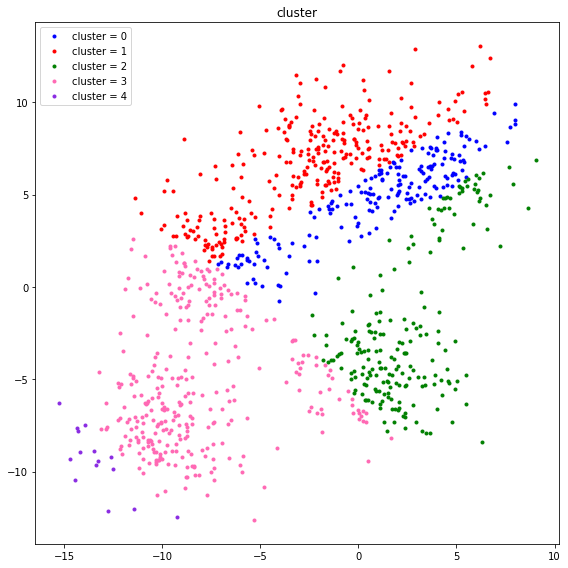

57.95539527931746
[   0] loss = 57.95540
[[  2.06041432   5.17383946]
 [  0.41774554   7.93220968]
 [  4.08872331   2.65660856]
 [ -9.29076237  -8.88365587]
 [-12.76829978 -12.10944399]]
[   1] loss = 52.24196
[[  0.97319499   4.87084919]
 [ -2.47243913   6.68015789]
 [  2.40008833  -2.2104513 ]
 [ -8.17004312  -5.12547245]
 [-13.32685105  -9.42698467]]
[   2] loss = 51.30749
[[  3.13376856   6.21857864]
 [ -3.90114243   5.78431373]
 [  1.2276539   -4.43523168]
 [ -8.1446562   -3.68143047]
 [-11.27701144  -8.77215645]]
[   3] loss = 49.99417
[[  3.14801139   6.57190739]
 [ -4.17847808   5.2979249 ]
 [  0.90888373  -4.53560865]
 [ -8.17331835  -1.89159276]
 [-10.26634552  -8.3339301 ]]
[   4] loss = 49.39374
[[  3.02964487   6.70282543]
 [ -3.83537659   5.46606951]
 [  0.86873053  -4.5026988 ]
 [ -8.11318743  -0.39356565]
 [-10.00715253  -7.96016945]]
[   5] loss = 49.24919
[[ 3.12547363  6.71340135]
 [-3.10653262  5.99786004]
 [ 0.87451416 -4.53078124]
 [-7.83152293  0.50888833]
 [-9.9

In [33]:
centroid, loss_iteration, centroid_iteration, label_feature = find_centroid(5, 20)

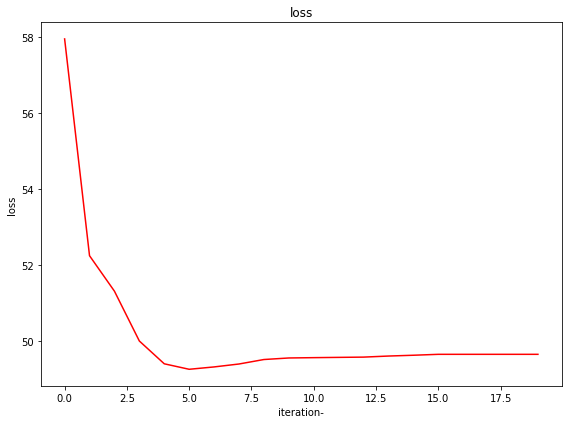

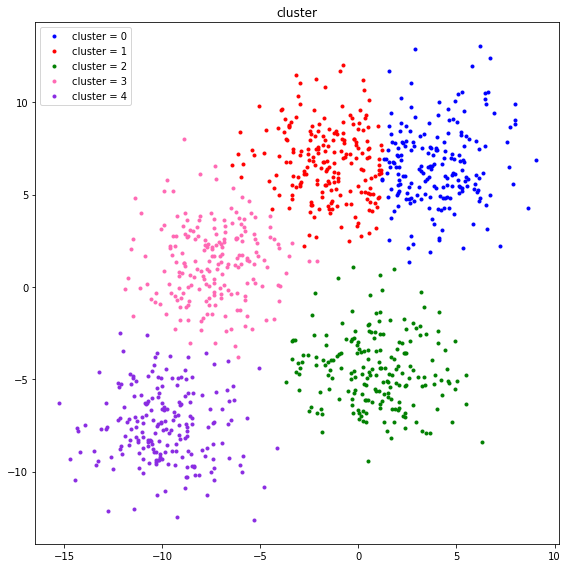

[[57.95539528]
 [52.24196023]
 [51.30749004]
 [49.99416784]
 [49.3937391 ]
 [49.24919087]
 [49.31132101]
 [49.38840121]
 [49.50640716]
 [49.54718031]
 [49.55566167]
 [49.56285763]
 [49.5698403 ]
 [49.5981022 ]
 [49.6191565 ]
 [49.6433629 ]
 [49.6433629 ]
 [49.6433629 ]
 [49.6433629 ]
 [49.6433629 ]]


In [34]:
plot_loss_curve(loss_iteration)
plot_cluster(feature, label_feature, 5)
print(loss_iteration)

## plot the results

In [35]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    plt.plot(feature[:,0], feature[:,1], '.', color = 'blue')
    
    
#plot_data(feature)

In [36]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')

    plt.plot(list(range(0,len(loss_iteration))), loss_iteration, '-', color = 'red')

    plt.xlabel('iteration-')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()
    
#plot_loss_curve(loss_iteration)
#print(loss_iteration)

In [37]:
def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    
    num_data = centroid_iteration.shape[0]
    num_centroid = centroid_iteration.shape[1]
    
    colors = ['blue','red','green','hotpink','blueviolet','aquamarine','gray','olive','indigo','chocolate','greenyellow','gold','darkmagenta']
    
    for i in range(num_centroid - 1):    
        plt.plot(centroid_iteration[:,i,0], centroid_iteration[:,i,1], '-', color = colors[i], label = "class = "+str(i))
        plt.plot(centroid_iteration[0,i,0], centroid_iteration[0,i,1], 'o', color = 'blue')
        plt.plot(centroid_iteration[num_data-1,i,0], centroid_iteration[num_data-1,i,1], 's', color = 'red')
        
    i = num_centroid-1
    plt.plot(centroid_iteration[:,i,0], centroid_iteration[:,i,1], '-', color = colors[i], label = "class = "+str(i))
    plt.plot(centroid_iteration[0,i,0], centroid_iteration[0,i,1], 'o', color = 'blue', label = "initial")
    plt.plot(centroid_iteration[num_data-1,i,0], centroid_iteration[num_data-1,i,1], 's', color = 'red', label = "final")

    plt.legend()
    plt.tight_layout()
    plt.show()

#plot_centroid(centroid_iteration)

In [38]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    num_data = feature.shape[0]
    num_cluster = label_cluster
    colors = ['blue','red','green','hotpink','blueviolet','aquamarine','gray','olive','indigo','chocolate','greenyellow','gold','darkmagenta']

    point_x = feature[:,0]
    point_y = feature[:,1]

    for i in range(num_cluster):
        x_filt = point_x[label_feature[:] == i]
        y_filt = point_y[label_feature[:] == i]
        plt.plot(x_filt, y_filt, '.', color = colors[i], label = "cluster = "+str(i))

    plt.legend()
    plt.tight_layout()
    plt.show()

#plot_cluster(feature, label_feature, 5)

***

# results

***

1. plot the input data

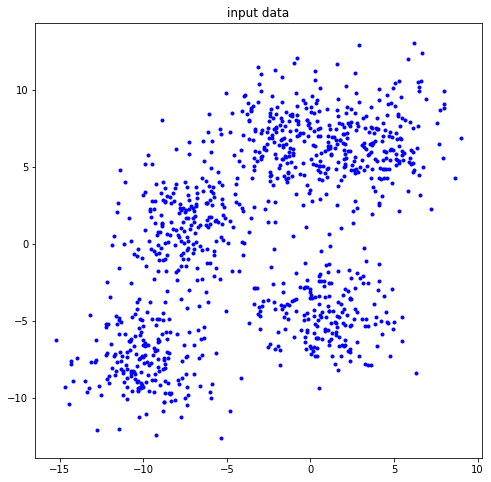

In [39]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

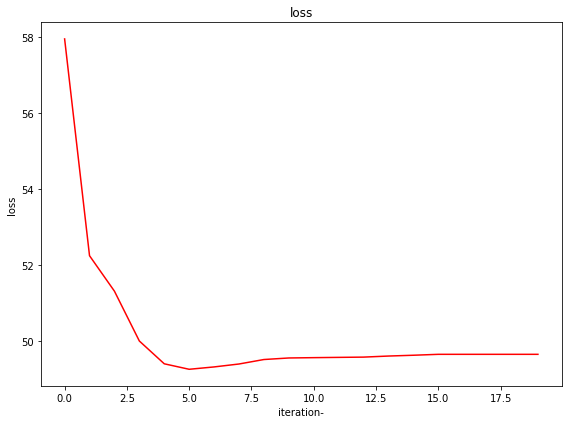

In [40]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

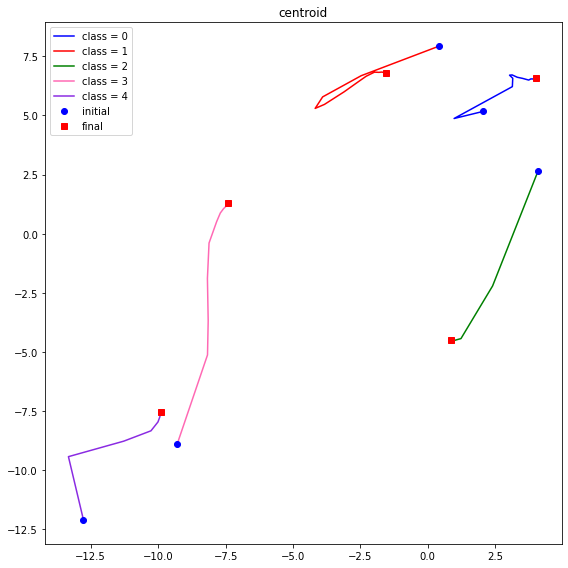

In [41]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

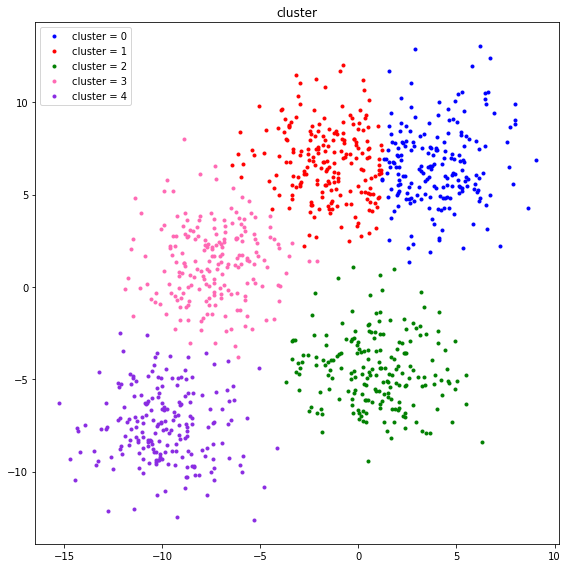

In [42]:
plot_cluster(feature, label_feature, 5)

***

5. plot the loss over the iterations with the number of clusters being 10

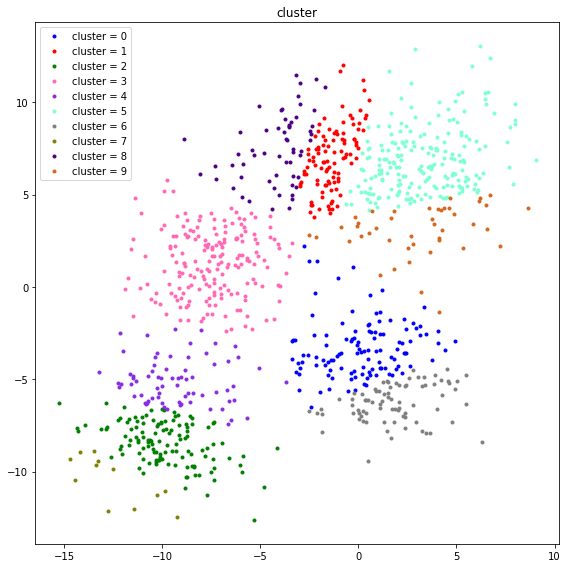

107.86940274542583
[   0] loss = 107.86940
[[  0.91848264  -1.39754004]
 [ -1.08121009   8.28091476]
 [ -9.73263476  -8.55070952]
 [ -7.87046684   0.4252438 ]
 [ -8.80576168  -4.95894193]
 [  1.50750625   7.43746931]
 [  3.64330246  -7.90339459]
 [-11.43782732 -12.04112316]
 [ -3.44107951   8.91450219]
 [  2.57334848   1.33095633]]
[   1] loss = 104.89330
[[  0.12528     -3.28359659]
 [ -1.34988163   7.01747357]
 [ -9.85191719  -8.43467204]
 [ -7.47384995   1.26978367]
 [ -9.23783271  -5.09926322]
 [  3.32527079   6.92077025]
 [  1.8033925   -6.27148157]
 [-12.45898449 -10.44363025]
 [ -4.16555212   7.51057556]
 [  3.07247991   3.0708319 ]]
[   2] loss = 104.40305
[[ -0.07170795  -3.3191299 ]
 [ -1.10170096   6.8561192 ]
 [ -9.46434818  -8.51489401]
 [ -7.41081454   1.3133172 ]
 [ -9.36107403  -5.00441509]
 [  3.92536208   7.31358641]
 [  1.89509673  -6.02802014]
 [-12.80925691  -9.24931757]
 [ -4.38082422   7.28148235]
 [  2.92551034   3.65879078]]
[   3] loss = 103.96946
[[ -0.239045

[  27] loss = 103.28497
[[ -1.09722906  -3.66427257]
 [  0.15802632   8.52412645]
 [ -8.02579243  -8.74603183]
 [ -7.54400705   1.35730794]
 [ -9.65194886  -4.77986887]
 [  5.28507539   7.23136556]
 [  2.17895941  -5.26450562]
 [-11.46025875  -8.40876609]
 [ -3.06597307   6.1200527 ]
 [  2.06345446   4.64462769]]
[  28] loss = 103.28497
[[ -1.09722906  -3.66427257]
 [  0.15802632   8.52412645]
 [ -8.02579243  -8.74603183]
 [ -7.54400705   1.35730794]
 [ -9.65194886  -4.77986887]
 [  5.28507539   7.23136556]
 [  2.17895941  -5.26450562]
 [-11.46025875  -8.40876609]
 [ -3.06597307   6.1200527 ]
 [  2.06345446   4.64462769]]
[  29] loss = 103.28497
[[ -1.09722906  -3.66427257]
 [  0.15802632   8.52412645]
 [ -8.02579243  -8.74603183]
 [ -7.54400705   1.35730794]
 [ -9.65194886  -4.77986887]
 [  5.28507539   7.23136556]
 [  2.17895941  -5.26450562]
 [-11.46025875  -8.40876609]
 [ -3.06597307   6.1200527 ]
 [  2.06345446   4.64462769]]
[  30] loss = 103.28497
[[ -1.09722906  -3.66427257]
 [

In [50]:
centroid, loss_iteration, centroid_iteration, label_feature = find_centroid(10, 50)

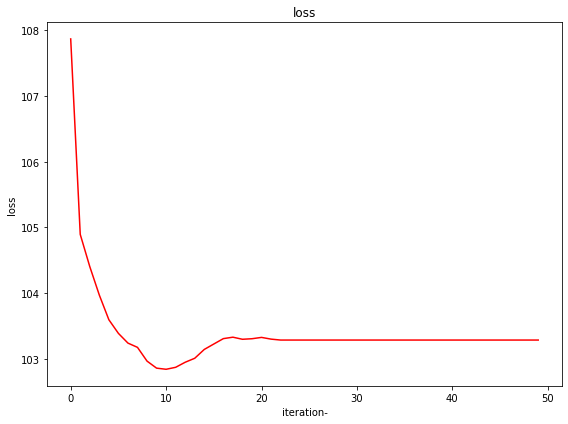

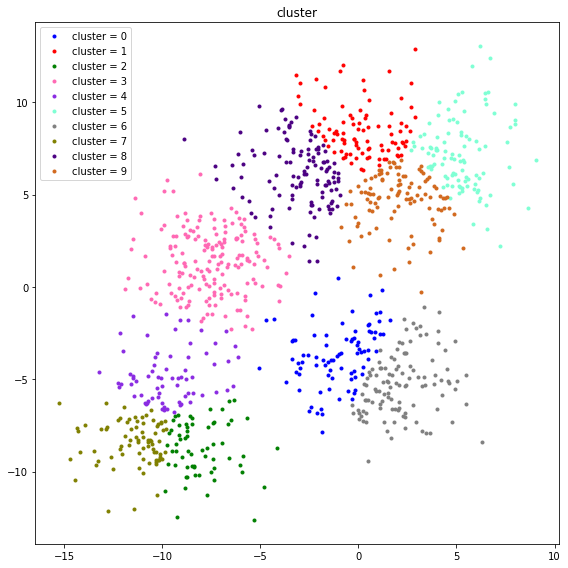

[[107.86940275]
 [104.89330495]
 [104.4030459 ]
 [103.96946302]
 [103.59421766]
 [103.38661987]
 [103.23860565]
 [103.17373896]
 [102.96442667]
 [102.85736077]
 [102.84003343]
 [102.87011745]
 [102.94713649]
 [103.00767651]
 [103.14220821]
 [103.22487219]
 [103.30676202]
 [103.32861032]
 [103.29684902]
 [103.30518925]
 [103.3253109 ]
 [103.2991004 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]
 [103.2849726 ]]


In [51]:
plot_loss_curve(loss_iteration)
plot_cluster(feature, label_feature, 10)
print(loss_iteration)

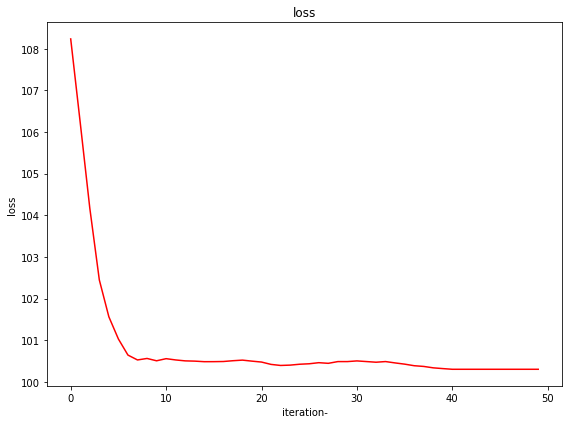

In [278]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

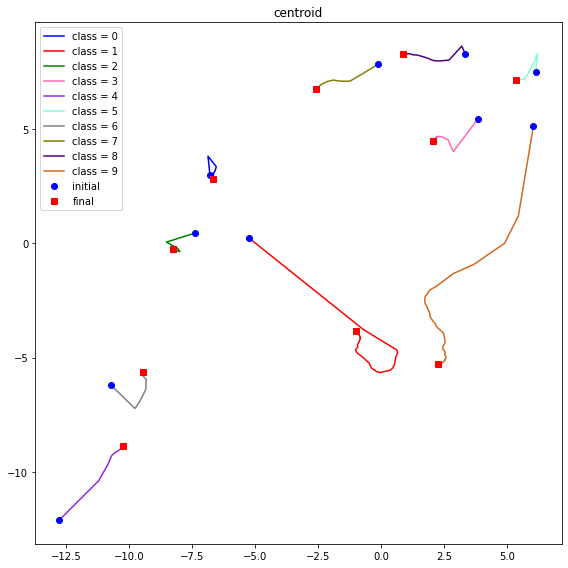

In [279]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

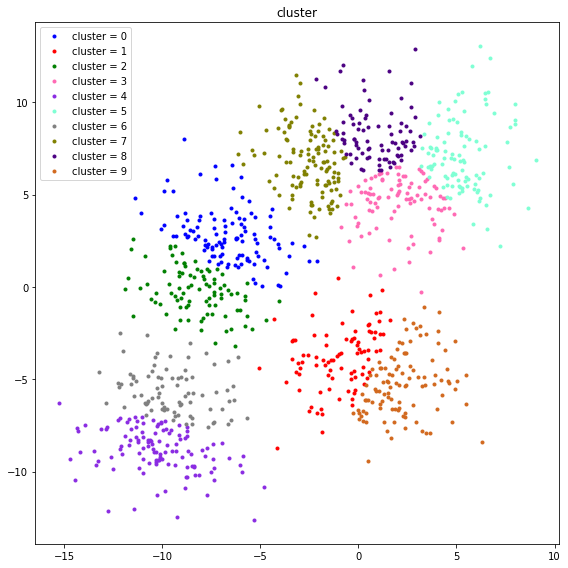

In [280]:
plot_cluster(feature, label_feature, 10)

***